In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import csv

# Computational study of a PDE-ODE system which describes Glioblastoma's growth
**by:** Alvaro Villamizar

## Introduction

The glioblastoma Multiforme (GBM) is a type of cerebral tumor 
that belongs to the gliomas' group. It is notorious for its high malignancy in humans, typically resulting in a life expectancy of only 14.6 months with standar treatments. Furthermore, GBM is among the most common brain tumors, accounting for 45.6% occurence of all cerebral tumors, and it has an exceptionally high recurrence rate from 90% to 100%.

<figure class="image">
<p align="center">
<img src="https://www.frontiersin.org/files/Articles/41858/fonc-03-00062-HTML-r1/image_m/fonc-03-00062-g002.jpg" width="500" height="auto">
</p>
<figcaption> This photo shows how noticeable is the growth of the GBM. </figcaption>
</figure>

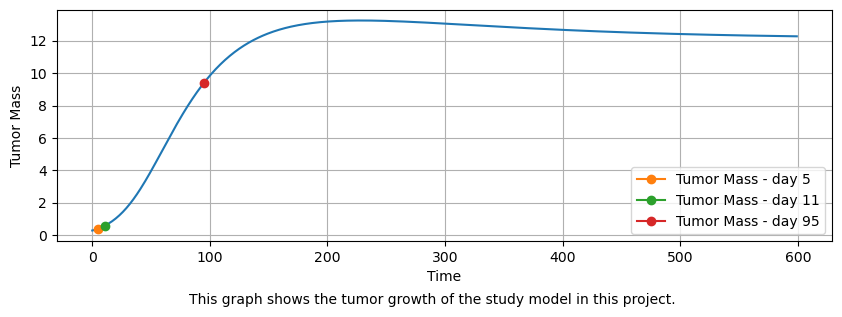

In [29]:
txt="This graph shows the tumor growth of the study model in this project."

fig, ax = plt.subplots(figsize=(10,3)) 
plt.plot(df['Time'], df['TM_Rho1'])
plt.plot(df['Time'][5], df['TM_Rho1'][5], marker="o", label='Tumor Mass - day 5')
plt.plot(df['Time'][11], df['TM_Rho1'][11], marker="o", label='Tumor Mass - day 11')
plt.plot(df['Time'][95], df['TM_Rho1'][95], marker="o", label='Tumor Mass - day 95')
plt.legend()
plt.grid()
ax.set_xlabel('Time')
ax.set_ylabel('Tumor Mass')
fig.text(.5, -.1, txt, ha='center')
plt.show()

## Importance of the problem

Gliomas represent a group of malignant tumors that can originate in any part of the central nervious system (CNS), which includes the brain and, less frequently, the medullary spine. These tumors are characterized by their infiltrative growth and tendency to spread within the CNS. These tumors are classified as **unifocal** when a single tumoral mass is present in the patient, and **multifocal** when there are two or more independent tumoral masses.

Due to the complex dynamics of the glioblastomas, any attempt to model this behaviour is of utmost importance. The objective of this project is to understand the description of the following model and develop it to gain insights into its behaviour.

## PDE-ODE Model

A mathematical model describing cellular dynamics involved in GBM is presented in [1]. This model defines tumoral cellular density, $T(x,y)$, necrotic cellular density, $N(x,y)$, and vascular concentration, $\Phi (x,y)$, within a domain $\Omega \subset \mathbb{R}^3$ and an time interval $(0,T_f)$, where $0 \leq T_f \leq \infty$. The model is defined by the following PDE-ODE system:

\begin{align}
\begin{cases}
        \dfrac{\partial T}{\partial t} - \underbrace{\nabla \cdot \left( \left(\kappa_1 P(\Phi,T)+ \kappa_0 \right)\nabla T \right)}_{\text{Diffusion}} = \underbrace{f_1 (T,N,\Phi)}_{\text{Reaction}} \ \text{en} \ (0,T_f)\times \Omega,\\[.2cm]
        \dfrac{\partial N}{\partial t} = \underbrace{f_2(T,N,\Phi)}_{\text{Reaction}} \ \text{en} \ (0,T_f)\times \Omega,\\[.2cm]
        \dfrac{\partial \Phi}{\partial t} = \underbrace{f_3(T,N,\Phi)}_{\text{Reaction}} \ \text{en} \ (0,T_f)\times \Omega, 
\end{cases}
\end{align}

Here, $0 < \kappa_1, \kappa_2 \in \mathbb{R}$ represents diffusion coeficients, reflecting anisotropic and isotropic diffusion of cancer cells, respectively. The functions $f_i (i=1,2,3)$ describes source terms that govern the relationships between the system variables, defined as follow:

\begin{align}
\begin{cases}
        f_1(T,N,\Phi) &= \underbrace{\rho \ P(\Phi,T)\ T \left(1-\dfrac{T+N+\Phi}{K} \right)}_{\text{Turmor growth}} -\underbrace{\alpha \ T \ S(\Phi,T)}_{\text{Hypoxia}} -\underbrace{\beta_1 N\ T}_{\text{Trans. T to N}},\\[.2cm]
        f_2(T,N,\Phi) &= \underbrace{\alpha \ T \ S(\Phi,T)}_{\text{Hypoxia}} + \underbrace{\Phi\ Q(T,N)}_{\text{Vasculature destruction}} + \underbrace{\beta_1 N\ T }_{\text{Transformation of T to N}},\\[.2cm]
        f_3(T,N,\Phi) &= \underbrace{\gamma \ R(\Phi,T) \ \Phi \left( 1- \dfrac{T+N+\Phi}{K} \right)}_{\text{Vasculature growth}} -\underbrace{\Phi\ Q(T,N)}_{\text{Vasculature destruction}}.\\
\end{cases}
\end{align} 
        
The function $P(\Phi, T)$ characterizes the vascular fractional volume and is defined by the following expression:

\begin{align}
P(\Phi,T) = \dfrac{\Phi_+}{\Phi_+ + T_+}, \text{ if } (\Phi,T) \neq (0,0),
\end{align}

where, $T_+=\operatorname{max}\{0,T\}$ and $\Phi_+=\operatorname{max}\{0, \Phi \}$.

Additionally, the functions $S(\Phi, T), Q(T,N),$ and $R(\Phi,T)$ are dimensionaless factors, which are given by the following equations:

- $S(\Phi,T) = \sqrt{1- P(\Phi,T)^2}$,
- $Q(T,N) = \delta T + \beta_2 N$,
- $R(\Phi,T) = \dfrac{T}{K}\sqrt{1- P(\Phi,T)^2}$.

Due to reported observations regarding the behaviour of this patology, it has been found that tumor cells exhibit random behaviour when there are no nutritional limitations. Therefore, it is considered $\kappa_1 = 0$ and $\kappa_0 = 1$, to stablish a diffusion that models this behavior. The rest of biological constants are summarized as followed.


| Variable   | Description                                    | Units      |
|------------|------------------------------------------------|------------|
| $\kappa_1$ | Anisotropic diffusion speed                    | $cm^2$/day |
| $\kappa_0$ | Isotropic difussion                            | $cm^2$/day |
| $v$        | Difussion speed                                | $cm^2$/day |
| $\rho$     | celular tumoral proliferation rate             | 1/day      |
| $K$        | Cerebral capacity                              | cel/$cm ^3$ |
| $\alpha$   | Death rate due to persistent hypoxemia         | 1/day      |
| $\delta$   | Vascular destruction due to tumoral action     | 1/day      |
| $\beta_2$  | Transformation rate of Vasculature to necrosis | 1/day      |
| $\beta_1$  | Transformation rate of Tumor to necrosis       | 1/day      |
| $\gamma$ | Vascular proliferation                           | 1/day      |

In conclusion, the study model is given by:

\begin{align}
\begin{cases}
        \dfrac{\partial T}{\partial t} -\Delta T &= \rho \ P(\Phi,T)\ T \left(1-\dfrac{T+N+\Phi}{K} \right) -\alpha \ T \ \sqrt{1- P(\Phi,T)^2} -\beta_1 N\ T,\\[.2cm]
        \dfrac{\partial N}{\partial t} &= \alpha \ T \ \sqrt{1- P(\Phi,T)^2} + \delta T \Phi + \beta_2 N \Phi + \beta_1 N\ T ,\\[.2cm]
        \dfrac{\partial \Phi}{\partial t} &= \gamma \ \dfrac{T}{K}\sqrt{1- P(\Phi,T)^2} \ \Phi \left( 1- \dfrac{T+N+\Phi}{K} \right) - \delta T \Phi - \beta_2 N \Phi.\\
\end{cases}
\end{align}

for all $(t,x) \in (0,T_f) \times \Omega$, along with non-boundary flow conditions $\partial \Omega$ of $\Omega$,

\begin{align}
\dfrac{\partial T}{\partial \mathbf{n}} = 0 \text{ on } (0,T_f) \times \partial \Omega,
\end{align}

where $\mathbf{n}$ is the exterior and unit normal vector on $\partial \Omega$, and the initial conditions

\begin{align}
T(0,x) = T_0(x), \ N(0,x)= N_0(x), \ \Phi(0,x)= \Phi_0(x), \ x \in \Omega
\end{align}


# Numerical Simulations

In this part, the objective is to show approximate solutions of the PDE-ODE system. The numerical model, can be seen in Glioblastoma.pde, is a temporal approximation by finite difference, and an approximation by finite elements of type $P_1$ in space.

For all simulations, the domain was the unit square $\Omega = (0,1)^2$, and for initial conditions for the vasculature and necrosis, $\Phi_0(x)= 0.5$ and $N_0(x)=0$, respectively.

For the temporal approximation, the finite difference squema used a partition of the time interval, given as:

\begin{align}
    (0,T_f] = \bigcup_{k=0}^{K_f-1}(t_k,t_{k+1}],
\end{align}

where $K_f \in \mathbf{N}$, $t_k=kdt$ y $dt = \dfrac{T_f}{K_f}$ represent the time step, with $T_f=500$.

And, the spacial approximation, the finite elements the domain was discretized

\begin{align}
    \overline{\Omega} = \bigcup_{\mathcal{K} \in \mathcal{T}_h} \mathcal{K}.
\end{align}

## Equilibrium solutions

One of the most important aspects to analyze in the set of solutions of a PDE equation, is its asyntotic behaviour. For that purpose, in this section the objective is analyze the asyntotic behaviour of the PDE-ODE system.

For each simulation the parameters used are defined as followed:

| Parameters | $\rho$ | $\alpha$ | $\beta_1$ | $\beta_2$ | $\gamma$ | $\delta$ | $K$ |
|------------|--------|----------|-----------|-----------|----------|----------|-----|
| Values     | 1      | 0.03     | 0.03      | 0.03      | 0.003    | 0.3      | 1   |

The initial conditions used for the analysis of the asyntotic behaviour, are presented in the next graphs.

In [10]:
# Loading all the simulation data for final time step in the solution of the PDE-ODE system

# Solutions using the unifocal mass
Tumor= np.loadtxt('Glioblastoma_graph.txt')[:,0].reshape(101,101)
Vasculature = np.loadtxt('Glioblastoma_graph.txt')[:,1].reshape(101,101)
Necrosis = np.loadtxt('Glioblastoma_graph.txt')[:,2].reshape(101,101)

# Solutions using the two multifocal mass
Tumor2= np.loadtxt('Glioblastoma_graph2.txt')[:,0].reshape(101,101)
Vasculature2 = np.loadtxt('Glioblastoma_graph2.txt')[:,1].reshape(101,101)
Necrosis2 = np.loadtxt('Glioblastoma_graph2.txt')[:,2].reshape(101,101)

# Solutions using the three multifocal mass
Tumor3= np.loadtxt('Glioblastoma_graph3.txt')[:,0].reshape(101,101)
Vasculature3 = np.loadtxt('Glioblastoma_graph3.txt')[:,1].reshape(101,101)
Necrosis3 = np.loadtxt('Glioblastoma_graph3.txt')[:,2].reshape(101,101)

In [15]:
x= np.linspace(0,1, num=101)
y= np.linspace(0,1, num=101) 

# Initial condition (unifocal mass)
def Gauss(x, y): 
    return 0.5* np.exp(-0.5*(((x-0.5)/0.3)**2 + ((y-0.5)/0.3)**2)) 

# Initial condition (Two multifocal mass)
def Gauss2(x,y):
    return 0.5* np.exp(-0.5*((6*(x-3/4))**2 + (6*(y-3/4))**2)) + 0.5* np.exp(-0.5*((6*(x-1/4))**2 + (6*(y-1/4))**2))

# Initial condition (Three multifocal mass)
def Gauss3(x,y):
    return 0.5* np.exp(-0.5*((6*(x-0.25))**2 + (6*(y-0.68))**2)) + 0.5* np.exp(-0.5*((6*(x-0.5))**2 + (6*(y-0.25))**2)) + 0.5* np.exp(-0.5*((6*(x-0.75))**2 + (6*(y-0.68))**2))

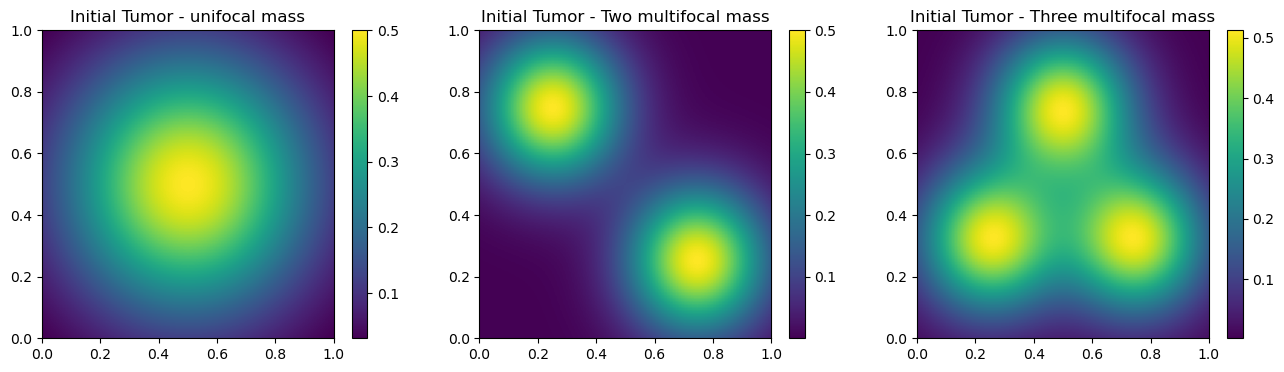

In [11]:
#Plotting the colormap of the initial conditions

f = plt.figure(figsize=(16,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

X, Y = np.meshgrid(x, y) 
Z= Gauss(X, Y)
Z2= Gauss2(X, Y)
Z3= Gauss3(X, Y)

extent = [x.min(), x.max(), y.min(), y.max()]
im=ax.imshow(Z, extent=extent, aspect = 'auto')
ax.set_title('Initial Tumor - unifocal mass')
im2=ax2.imshow(Z2, extent=extent, aspect = 'auto')
ax2.set_title('Initial Tumor - Two multifocal mass')
im3=ax3.imshow(Z3, extent=extent, aspect = 'auto')
ax3.set_title('Initial Tumor - Three multifocal mass')

plt.colorbar(im)
plt.colorbar(im2)
plt.colorbar(im3)
plt.show()

In the following figures, it is observed that the tumoral density and the vascular concentration approach zero as time tends towards infinity. Furthermore, both vascular concentration and tumoral density decline more rapidly in regions where necrotic density proliferate. And, the necrotic density occupied the entire domain, particularly those regions where the tumor was initially located.

The same behaviour is observed in the solutions using the other two initial conditions.

### Initial Tumor - Unifocal mass

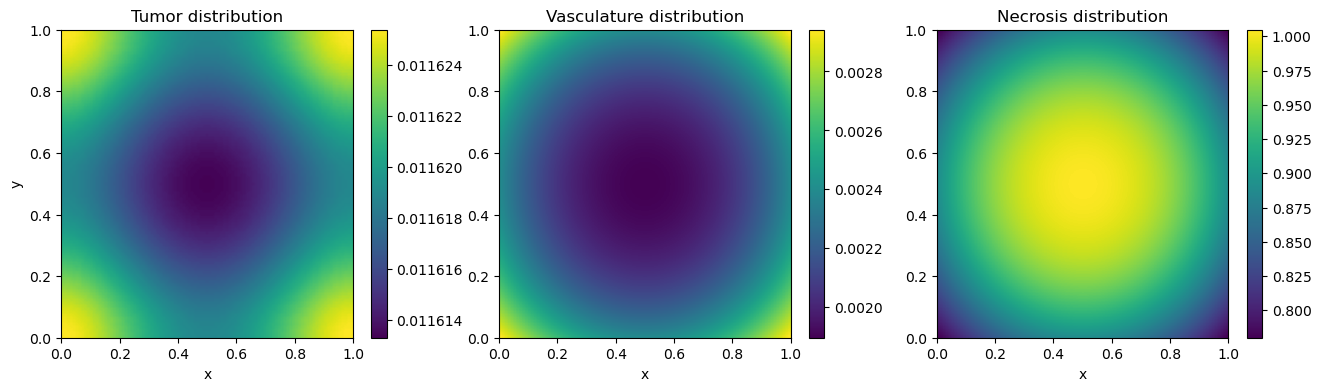

In [12]:
# Final time step in the solutions, using the first initial condition

f = plt.figure(figsize=(16,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

im=ax.imshow(Tumor, extent=extent, aspect = 'auto')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Tumor distribution')

im2=ax2.imshow(Vasculature, extent=extent, aspect = 'auto')
ax2.set_xlabel('x')
ax2.set_title('Vasculature distribution')

im3=ax3.imshow(Necrosis, extent=extent, aspect = 'auto')
ax3.set_xlabel('x')
ax3.set_title('Necrosis distribution')

plt.colorbar(im)
plt.colorbar(im2)
plt.colorbar(im3)
plt.show()

### Initial Tumor - Two multifocal masses

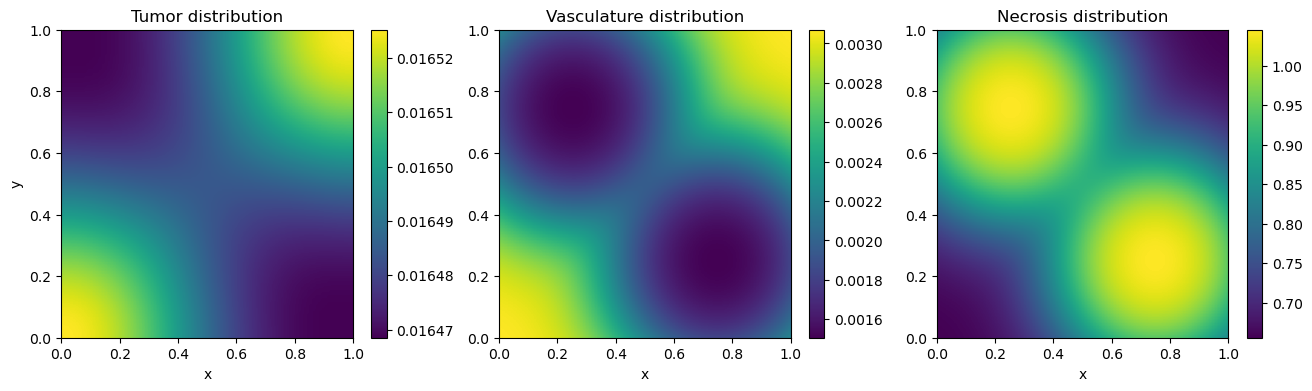

In [13]:
# Final time step in the solutions, using the second initial condition

f = plt.figure(figsize=(16,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

im=ax.imshow(Tumor2, extent=extent, aspect = 'auto')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Tumor distribution')

im2=ax2.imshow(Vasculature2, extent=extent, aspect = 'auto')
ax2.set_xlabel('x')
ax2.set_title('Vasculature distribution')

im3=ax3.imshow(Necrosis2, extent=extent, aspect = 'auto')
ax3.set_xlabel('x')
ax3.set_title('Necrosis distribution')

plt.colorbar(im)
plt.colorbar(im2)
plt.colorbar(im3)
plt.show()

### Initial Tumor - Three multifocal masses

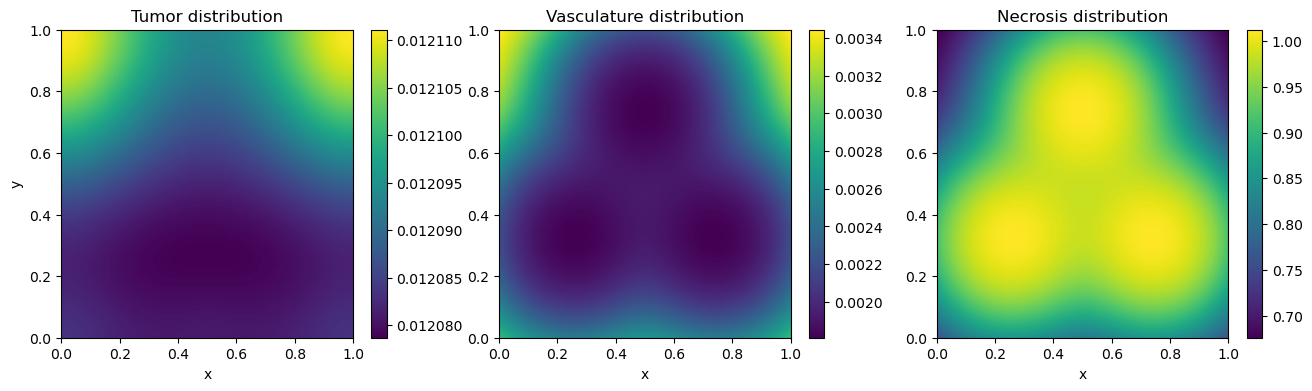

In [14]:
# Final time step in the solutions, using the third initial condition

f = plt.figure(figsize=(16,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Tumor distribution')

im2=ax2.imshow(Vasculature3, extent=extent, aspect = 'auto')
ax2.set_xlabel('x')
ax2.set_title('Vasculature distribution')

im3=ax3.imshow(Necrosis3, extent=extent, aspect = 'auto')
ax3.set_xlabel('x')
ax3.set_title('Necrosis distribution')

plt.colorbar(im)
plt.colorbar(im2)
plt.colorbar(im3)
plt.show()

## Density graphs

In this section, the objective is to analyze the dispersion of the approximate solutions by plotting its maximum and minimum values for each time step.

With this graphs, it is observed its asyntotic behaviour and more characteristics of each solution.

In [36]:
# Loading simulation data for the constant analysis

df2= pd.read_csv("Glioblastoma_density.csv")
df2.describe()

,Time,TMin,TMax,VMin,VMax,NMin,NMax,TMin2,TMax2,VMin2,VMax2,NMin2,NMax2,TMin3,TMax3,VMin3,VMax3,NMin3,NMax3
count,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000
mean,299.500000,0.164192,0.166638,0.093054,0.086948,5.111227e-01,0.794465,0.153337,0.159463,0.079323,0.071672,5.230635e-01,0.808221,0.147106,0.153481,0.074798,0.067229,5.248071e-01,0.805422
std,173.349358,0.105227,0.105188,0.149826,0.143014,2.095796e-01,0.352727,0.105428,0.106204,0.134104,0.124346,1.878277e-01,0.310998,0.106246,0.108082,0.127422,0.118062,1.777813e-01,0.292687
min,0.000000,0.000374,0.033134,0.001872,0.000897,5.345470e-22,0.011214,0.000697,0.024789,0.002286,0.001101,1.830890e-12,0.011436,0.005491,0.020800,0.002658,0.001292,2.168440e-08,0.011458
25%,149.750000,0.066900,0.068497,0.004053,0.002571,4.317155e-01,0.581554,0.055255,0.059884,0.004519,0.002826,4.682263e-01,0.647169,0.048712,0.051571,0.005029,0.003146,4.780125e-01,0.664436
50%,299.500000,0.141242,0.142628,0.013466,0.010822,6.064330e-01,0.931247,0.127460,0.135908,0.012659,0.009897,6.079040e-01,0.934933,0.118289,0.129947,0.013012,0.010117,6.052270e-01,0.927141
75%,449.250000,0.261192,0.263525,0.101543,0.093889,6.656735e-01,1.085165,0.249152,0.255351,0.075748,0.067702,6.551227e-01,1.054615,0.242854,0.250580,0.069384,0.061602,6.472850e-01,1.032907
max,599.000000,0.342797,0.346091,0.500000,0.489286,6.905080e-01,1.152630,0.336269,0.343756,0.500000,0.489299,6.741950e-01,1.104390,0.334836,0.342659,0.500000,0.489286,6.638240e-01,1.075420


### First simulation

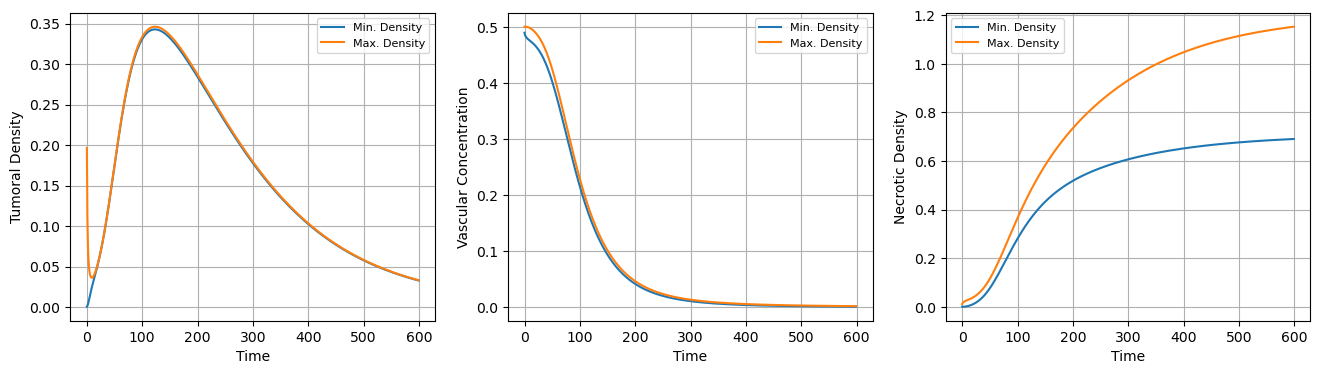

In [32]:
f = plt.figure(figsize=(16,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.plot(df2['Time'], df2['TMin'], label='Min. Density')
ax.plot(df2['Time'], df2['TMax'], label='Max. Density')
ax.set_xlabel('Time')
ax.set_ylabel('Tumoral Density')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax.legend(prop={'size': 8}) 
ax.grid()

ax2.plot(df2['Time'], df2['VMin'], label='Min. Density')
ax2.plot(df2['Time'], df2['VMax'], label='Max. Density')
ax2.set_xlabel('Time')
ax2.set_ylabel('Vascular Concentration')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax2.legend(prop={'size': 8}) 
ax2.grid()

ax3.plot(df2['Time'], df2['NMin'], label='Min. Density')
ax3.plot(df2['Time'], df2['NMax'], label='Max. Density')
ax3.set_xlabel('Time')
ax3.set_ylabel('Necrotic Density')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax3.legend(prop={'size': 8}) 
ax3.grid()


It is observed that the variation of the Tumor density and Vascular concentration both goes to zero as time goes to infinity. However, the necrotic densities growth as time goes to infinity. 

The same result obtained in the asymptotic behavior section is concluded. 

### Second Simulation

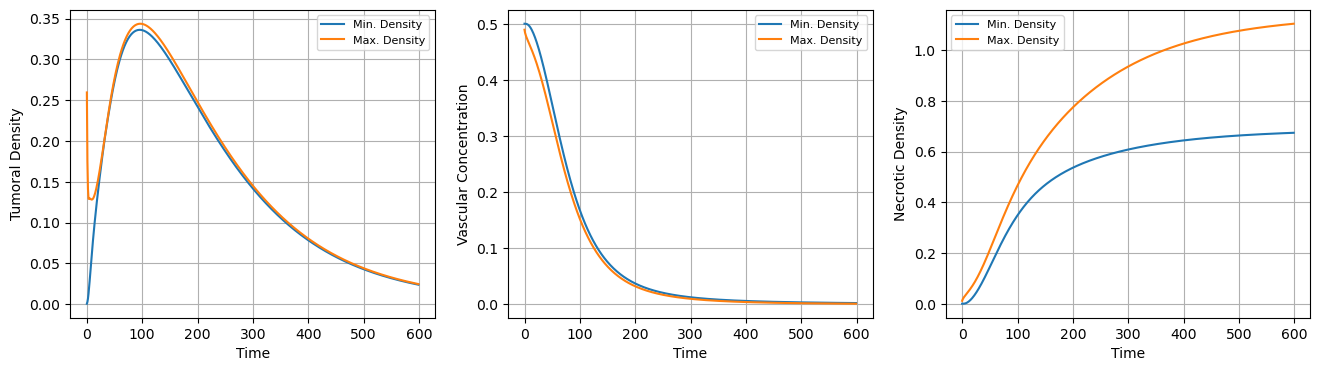

In [40]:
f = plt.figure(figsize=(16,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.plot(df2['Time'], df2['TMin2'], label='Min. Density')
ax.plot(df2['Time'], df2['TMax2'], label='Max. Density')
ax.set_xlabel('Time')
ax.set_ylabel('Tumoral Density')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax.legend(prop={'size': 8}) 
ax.grid()

ax2.plot(df2['Time'], df2['VMin2'], label='Min. Density')
ax2.plot(df2['Time'], df2['VMax2'], label='Max. Density')
ax2.set_xlabel('Time')
ax2.set_ylabel('Vascular Concentration')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax2.legend(prop={'size': 8}) 
ax2.grid()

ax3.plot(df2['Time'], df2['NMin2'], label='Min. Density')
ax3.plot(df2['Time'], df2['NMax2'], label='Max. Density')
ax3.set_xlabel('Time')
ax3.set_ylabel('Necrotic Density')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax3.legend(prop={'size': 8}) 
ax3.grid()

### Third Simulation

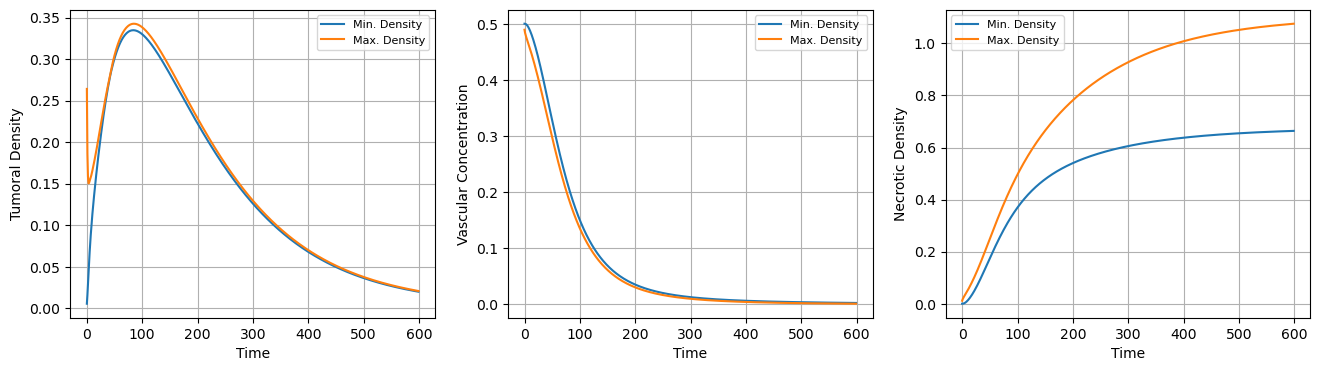

In [41]:
f = plt.figure(figsize=(16,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.plot(df2['Time'], df2['TMin3'], label='Min. Density')
ax.plot(df2['Time'], df2['TMax3'], label='Max. Density')
ax.set_xlabel('Time')
ax.set_ylabel('Tumoral Density')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax.legend(prop={'size': 8}) 
ax.grid()

ax2.plot(df2['Time'], df2['VMin3'], label='Min. Density')
ax2.plot(df2['Time'], df2['VMax3'], label='Max. Density')
ax2.set_xlabel('Time')
ax2.set_ylabel('Vascular Concentration')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax2.legend(prop={'size': 8}) 
ax2.grid()

ax3.plot(df2['Time'], df2['NMin3'], label='Min. Density')
ax3.plot(df2['Time'], df2['NMax3'], label='Max. Density')
ax3.set_xlabel('Time')
ax3.set_ylabel('Necrotic Density')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax3.legend(prop={'size': 8}) 
ax3.grid()

### Comparison of Tumor density 

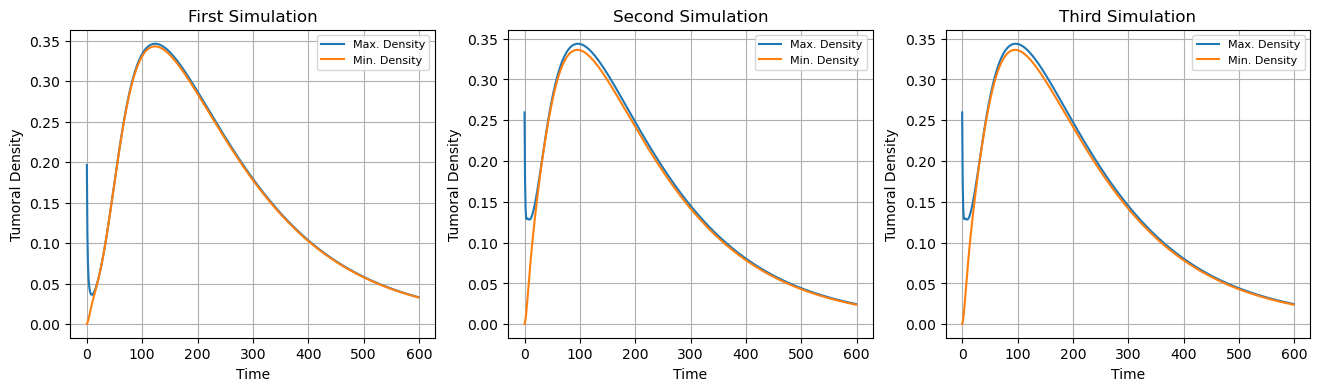

In [38]:
f = plt.figure(figsize=(16,4))
ax = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax.plot(df2['Time'], df2['TMax'], label='Max. Density')
ax.plot(df2['Time'], df2['TMin'], label='Min. Density')
ax.set_xlabel('Time')
ax.set_ylabel('Tumoral Density')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax.set_title('First Simulation')
ax.legend(prop={'size': 8}) 
ax.grid()

ax2.plot(df2['Time'], df2['TMax2'], label='Max. Density')
ax2.plot(df2['Time'], df2['TMin2'], label='Min. Density')
ax2.set_xlabel('Time')
ax2.set_ylabel('Tumoral Density')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax2.set_title('Second Simulation')
ax2.legend(prop={'size': 8}) 
ax2.grid()

ax3.plot(df2['Time'], df2['TMax2'], label='Max. Density')
ax3.plot(df2['Time'], df2['TMin2'], label='Min. Density')
ax3.set_xlabel('Time')
ax3.set_ylabel('Tumoral Density')
#ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax3.set_title('Third Simulation')
ax3.legend(prop={'size': 8}) 
ax3.grid()

It is observed that in each simulation, the total inital tumor mass is directly related to the tumor destruction's velocity, which means that as much tumor mass, the faster the tumor cells dissapear as time goes to infinity. 

## Tumoral Ring formation and Tumoral Mass growth

The objective of this section is to showcase the dynamics of the necrotic region surrounding the tumoral mass, known as tumoral ring (TR), which is one of the principal characteristics of the GBM, as well as to examine the tumoral mass growth.

### Tumoral Ring
To analyze this dynamic, the tumoral ring is quantified as a quotien between tumoral proliferation density, defined as $\int_{\Omega} T dx$, and the tumoral density, defined as $\int_{\Omega} (T+N) dx$. 

\begin{align}
    0 \leq TR = \dfrac{\int_{\Omega} T dx}{\int_{\Omega} (T+N) dx} \leq 1.
\end{align}

Thus, if RQ is close to zero, there exists a high density of necrosis, implying a slim tumoral ring. On the other hand, if TR is close to one, the necrosis density is not abundant, which implies a thick tumoral ring.

### Tumoral mass
To analyze the dynamics of tumoral mass growth, its mass is defined as $\int_{\Omega}(T + N) dx$, and each of the established parameters is varied to observe its behavior.

In [39]:
# Loading the database of Tumoral ring and mass formation
df = pd.read_csv("Glioblastoma.csv")
df.describe()

,Time,TR_Delta1.5,TM_Delta1.5,TR_Delta0.9,TM_Delta0.9,TR_Delta0.3,TM_Delta0.3,TR_Delta0.1,TM_Delta0.1,TR_Delta0.002,...,TR_Beta10.000003,TM_Beta10.000003,TR_Beta10.003,TM_Beta10.003,TR_Beta10.03,TM_Beta10.03,TR_Beta10.3,TM_Beta10.3,TR_Beta13,TM_Beta13
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,...,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,6.000000e+02,600.000000
mean,299.500000,0.154337,9.680513,0.191372,10.218192,0.291752,11.244260,0.416118,11.183280,0.810912,...,0.374461,10.422270,0.364320,10.512224,0.291752,11.244260,0.141805,12.087400,7.176223e-02,7.051828
std,173.349358,0.148539,2.244493,0.175942,2.610346,0.228369,3.385679,0.256159,3.840659,0.143509,...,0.186953,3.142900,0.192569,3.160437,0.228369,3.385679,0.252421,3.854710,2.068553e-01,2.160752
min,0.000000,0.013701,0.282723,0.017828,0.282723,0.043258,0.282723,0.104854,0.282723,0.539968,...,0.137331,0.282723,0.122969,0.282723,0.043258,0.282723,0.000001,0.282723,4.149960e-33,0.282723
25%,149.750000,0.037538,9.867797,0.048859,10.524625,0.099768,12.295250,0.193248,10.307075,0.685813,...,0.223280,10.263275,0.207221,10.479325,0.099768,12.295250,0.000060,12.029325,3.018215e-22,6.149878
50%,299.500000,0.099711,10.096050,0.128721,10.798400,0.220605,12.535050,0.345050,13.070750,0.832169,...,0.336599,11.239550,0.323709,11.372200,0.220605,12.535050,0.003017,13.826250,9.227660e-13,7.491770
75%,449.250000,0.242417,10.670950,0.298405,11.461750,0.430520,12.973025,0.606379,13.743150,0.947821,...,0.473183,12.438225,0.468892,12.490100,0.430520,12.973025,0.146040,14.375575,6.013933e-05,8.672645
max,599.000000,1.000000,11.444200,1.000000,12.191100,1.000000,13.267200,1.000000,13.961000,1.000000,...,1.000000,13.082100,1.000000,13.097800,1.000000,13.267200,1.000000,14.681800,1.000000e+00,9.620260


### Influence of $\alpha$ on Tumoral Ring and Mass Growth

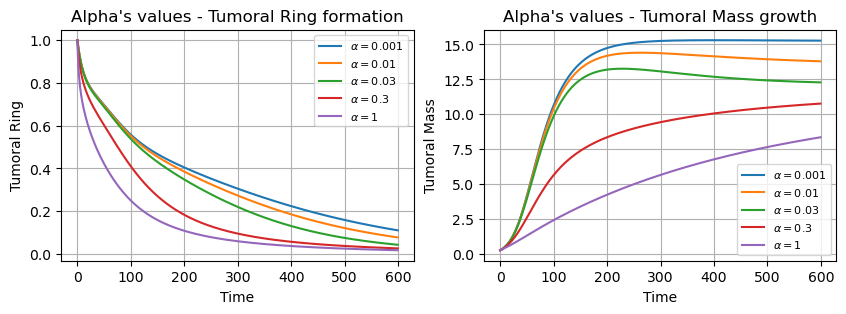

In [8]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(df['Time'], df['TR_Alpha0.001'], label='$\\alpha = 0.001$')
ax.plot(df['Time'], df['TR_Alpha0.01'], label='$\\alpha = 0.01$')
ax.plot(df['Time'], df['TR_Rho1'], label='$\\alpha = 0.03$')
ax.plot(df['Time'], df['TR_Alpha0.3'], label='$\\alpha = 0.3$')
ax.plot(df['Time'], df['TR_Alpha1'], label='$\\alpha = 1$')
ax.set_xlabel('Time')
ax.set_ylabel('Tumoral Ring')
ax.set_title('Alpha\'s values - Tumoral Ring formation')
ax.legend(prop={'size': 8}) 
ax.grid()

ax2.plot(df['Time'], df['TM_Alpha0.001'], label='$\\alpha = 0.001$')
ax2.plot(df['Time'], df['TM_Alpha0.01'], label='$\\alpha = 0.01$')
ax2.plot(df['Time'], df['TM_Rho1'], label='$\\alpha = 0.03$')
ax2.plot(df['Time'], df['TM_Alpha0.3'], label='$\\alpha = 0.3$')
ax2.plot(df['Time'], df['TM_Alpha1'], label='$\\alpha = 1$')
ax2.set_xlabel('Time')
ax2.set_ylabel('Tumoral Mass')
ax2.set_title('Alpha\'s values - Tumoral Mass growth')
ax2.legend(prop={'size': 8}) 
ax2.grid()

plt.show()

In the left graph, it is observed how different values of $\alpha$ influence the tumoral ring. When $\alpha$ approaches zero, the tumoral ring becomes slimmer as time progresses, but the rate of slimming is slowercompared to other terms. Conversely, when $\alpha$ increases, the tumoral ring becomes slimmer at a faster rate. In the right graph, As $\alpha$ approaches zero, the tumoral mass grows more rapidly as time goes to infinity. However, as $\alpha$ increases, the growth of the tumoral mass slow down.

### Influence of $\beta_1$ on Tumoral Ring and Mass Growth

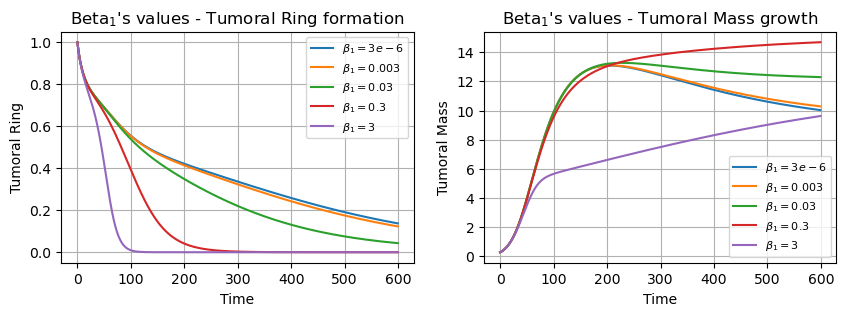

In [9]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(df['Time'], df['TR_Beta10.000003'], label='$\\beta_1 = 3e-6$')
ax.plot(df['Time'], df['TR_Beta10.003'], label='$\\beta_1 = 0.003$')
ax.plot(df['Time'], df['TR_Beta10.03'], label='$\\beta_1 = 0.03$')
ax.plot(df['Time'], df['TR_Beta10.3'], label='$\\beta_1 = 0.3$')
ax.plot(df['Time'], df['TR_Beta13'], label='$\\beta_1 = 3$')
ax.set_xlabel('Time')
ax.set_ylabel('Tumoral Ring')
ax.set_title('Beta$_1$\'s values - Tumoral Ring formation')
ax.legend(prop={'size': 8}) 
ax.grid()

ax2.plot(df['Time'], df['TM_Beta10.000003'], label='$\\beta_1 = 3e-6$')
ax2.plot(df['Time'], df['TM_Beta10.003'], label='$\\beta_1 = 0.003$')
ax2.plot(df['Time'], df['TM_Beta10.03'], label='$\\beta_1 = 0.03$')
ax2.plot(df['Time'], df['TM_Beta10.3'], label='$\\beta_1 = 0.3$')
ax2.plot(df['Time'], df['TM_Beta13'], label='$\\beta_1 = 3$')
ax2.set_xlabel('Time')
ax2.set_ylabel('Tumoral Mass')
ax2.set_title('Beta$_1$\'s values - Tumoral Mass growth')
ax2.legend(prop={'size': 8}) 
ax2.grid()

plt.show()

In the left grapht, it is observed how different values of $\beta_1$ influence the tumoral ring. Similar to the previous case, as $\beta_1$ approaches zero, the tumoral ring becomes slimmer over time at a slower rate compared to other terms. When $\beta_1$ increases, the slimming of the tumoral ring accelerates. In the right graph, it is observed a distinct pattern. As $\beta_1$ approaches 0.3, the tumoral mass grows exponentially. However, and grows continually as $\beta_1$ increases beyond 0.3, and the for other values, the rate of growth decrease whitout a clear relationship. 

### Influence of $\beta_2$ on Tumoral Ring and Mass Growth

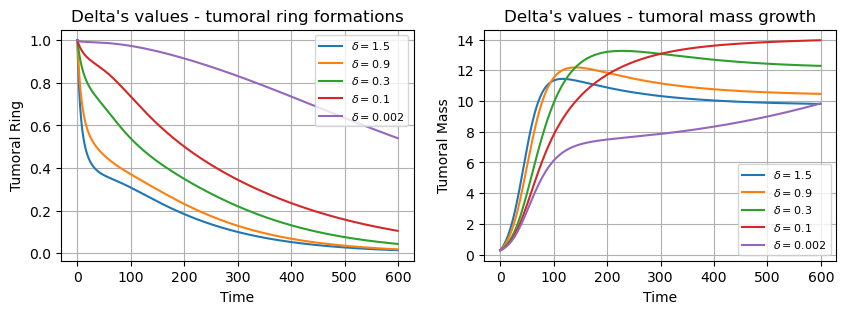

In [12]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(df['Time'], df['TR_Delta1.5'], label='$\delta = 1.5$')
ax.plot(df['Time'], df['TR_Delta0.9'], label='$\delta = 0.9$')
ax.plot(df['Time'], df['TR_Delta0.3'], label='$\delta = 0.3$')
ax.plot(df['Time'], df['TR_Delta0.1'], label='$\delta = 0.1$')
ax.plot(df['Time'], df['TR_Delta0.002'], label='$\delta = 0.002$')
ax.set_xlabel('Time')
ax.set_ylabel('Tumoral Ring')
ax.set_title('Delta\'s values - tumoral ring formations')
ax.legend(prop={'size': 8})
ax.grid()

ax2.plot(df['Time'], df['TM_Delta1.5'], label='$\delta = 1.5$')
ax2.plot(df['Time'], df['TM_Delta0.9'], label='$\delta = 0.9$')
ax2.plot(df['Time'], df['TM_Delta0.3'], label='$\delta = 0.3$')
ax2.plot(df['Time'], df['TM_Delta0.1'], label='$\delta = 0.1$')
ax2.plot(df['Time'], df['TM_Delta0.002'], label='$\delta = 0.002$')
ax2.set_xlabel('Time')
ax2.set_ylabel('Tumoral Mass')
ax2.set_title('Delta\'s values - tumoral mass growth')
ax2.legend(prop={'size': 8})
ax2.grid()

plt.show()

In the left graph, it is observed how different values of $\delta$ influence the tumoral ring. When $\delta$ becomes larger, the tumoral ring becomes slimmer over time, but the slimming rate is slower than for the other terms. Conversely, when $\delta$ decreases, the tumoral ring becomes slimmer at a faster pace. In the right graph, it is observed a different pattern. As $\delta$ approaches 0.1, the tumoral mass exhibits exponential growth. However, as $\delta$ approaches zero, the growth rate becomes significantly slower, and for the other values, the growth decreases without a clear relationship.

### Influence of $\beta_2$ on Tumoral Ring and Mass Growth

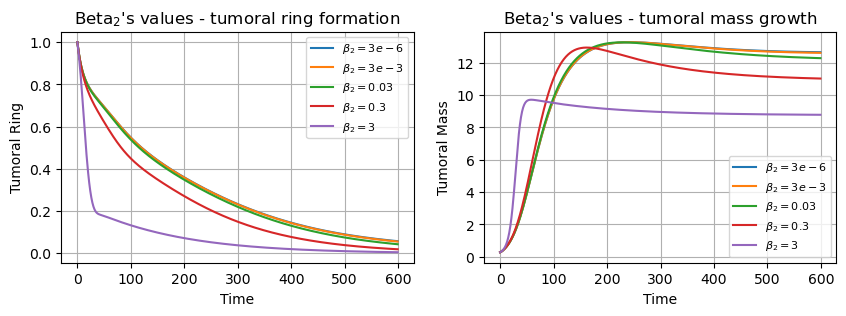

In [41]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)


ax.plot(df['Time'], df['TR_Beta20.000003'], label='$\\beta_2 = 3e-6$')
ax.plot(df['Time'], df['TR_Beta20.003'], label='$\\beta_2 = 3e-3$')
ax.plot(df['Time'], df['TR_Beta20.03'], label='$\\beta_2 = 0.03$')
ax.plot(df['Time'], df['TR_Beta20.3'], label='$\\beta_2 = 0.3$')
ax.plot(df['Time'], df['TR_Beta23'], label='$\\beta_2 = 3$')
ax.set_xlabel('Time')
ax.set_ylabel('Tumoral Ring')
ax.set_title('Beta$_2$\'s values - tumoral ring formation')
ax.legend(prop={'size': 8}) 
ax.grid()

ax2.plot(df['Time'], df['TM_Beta20.000003'], label='$\\beta_2 = 3e-6$')
ax2.plot(df['Time'], df['TM_Beta20.003'], label='$\\beta_2 = 3e-3$')
ax2.plot(df['Time'], df['TM_Beta20.03'], label='$\\beta_2 = 0.03$')
ax2.plot(df['Time'], df['TM_Beta20.3'], label='$\\beta_2 = 0.3$')
ax2.plot(df['Time'], df['TM_Beta23'], label='$\\beta_2 = 3$')
ax2.set_xlabel('Time')
ax2.set_ylabel('Tumoral Mass')
ax2.set_title('Beta$_2$\'s values - tumoral mass growth')
ax2.legend(prop={'size': 8}) 
ax2.grid()

plt.show()

In the left graph, it is observed how different values of $\beta_2$ influence the tumoral ring. Like previous cases, when $\beta_2$ decreases, the tumoral ring becomes slimmer over time, but the slimming rate is faster when $\beta_2$ increases. In the right graph, it is observed a different phenomenon. For various values of $\beta_2$, the tumoral mass grows larger as $\beta_2$ decreases and less as $\beta_2$ increases.

### Influence of $\rho$ on Tumoral Ring and Mass Growth

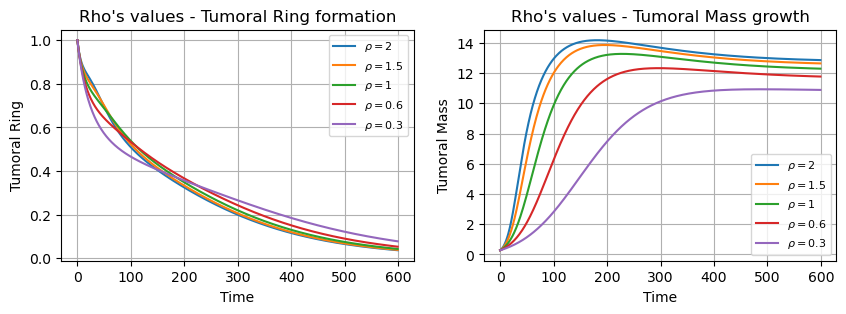

In [40]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(df['Time'], df['TR_Rho2'], label='$\\rho = 2$')
ax.plot(df['Time'], df['TR_Rho1.5'], label='$\\rho = 1.5$')
ax.plot(df['Time'], df['TR_Rho1'], label='$\\rho = 1$')
ax.plot(df['Time'], df['TR_Rho0.6'], label='$\\rho = 0.6$')
ax.plot(df['Time'], df['TR_Rho0.3'], label='$\\rho = 0.3$')
ax.set_xlabel('Time')
ax.set_ylabel('Tumoral Ring')
ax.set_title('Rho\'s values - Tumoral Ring formation')
ax.legend(prop={'size': 8}) 
ax.grid()

ax2.plot(df['Time'], df['TM_Rho2'], label='$\\rho = 2$')
ax2.plot(df['Time'], df['TM_Rho1.5'], label='$\\rho = 1.5$')
ax2.plot(df['Time'], df['TM_Rho1'], label='$\\rho = 1$')
ax2.plot(df['Time'], df['TM_Rho0.6'], label='$\\rho = 0.6$')
ax2.plot(df['Time'], df['TM_Rho0.3'], label='$\\rho = 0.3$')
ax2.set_xlabel('Time')
ax2.set_ylabel('Tumoral Mass')
ax2.set_title('Rho\'s values - Tumoral Mass growth')
ax2.legend(prop={'size': 8}) 
ax2.grid()

plt.show()

In the left graph, variations in $\rho$ have negligible effects on tumoral ring formation. In contrast, the right graph reveals that $\rho$ plays a significant role in the rate of tumoral mass growth. As $\rho$ increases, the growth is faster, and conversely when it value decreases.

### Influence of $\gamma$ on Tumoral Ring and Mass growth

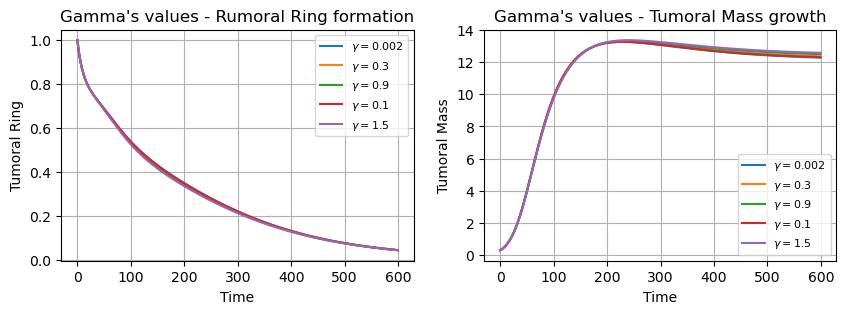

In [7]:
f = plt.figure(figsize=(10,3))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(df['Time'], df['TR_Gamma0.002'], label='$\gamma = 0.002$')
ax.plot(df['Time'], df['TR_Gamma0.3'], label='$\gamma = 0.3$')
ax.plot(df['Time'], df['TR_Gamma0.9'], label='$\gamma = 0.9$')
ax.plot(df['Time'], df['TR_Gamma0.1'], label='$\gamma = 0.1$')
ax.plot(df['Time'], df['TR_Gamma1.5'], label='$\gamma = 1.5$')
ax.set_xlabel('Time')
ax.set_ylabel('Tumoral Ring')
ax.set_title('Gamma\'s values - Rumoral Ring formation')
ax.legend(prop={'size': 8})
ax.grid()

ax2.plot(df['Time'], df['TM_Gamma0.002'], label='$\gamma = 0.002$')
ax2.plot(df['Time'], df['TM_Gamma0.3'], label='$\gamma = 0.3$')
ax2.plot(df['Time'], df['TM_Gamma0.9'], label='$\gamma = 0.9$')
ax2.plot(df['Time'], df['TM_Gamma0.1'], label='$\gamma = 0.1$')
ax2.plot(df['Time'], df['TM_Gamma1.5'], label='$\gamma = 1.5$')
ax2.set_xlabel('Time')
ax2.set_ylabel('Tumoral Mass')
ax2.set_title('Gamma\'s values - Tumoral Mass growth')
ax2.legend(prop={'size': 8}) 
ax2.grid()


plt.show()

Changes in $\gamma$ do not notably affect tumoral ring formation, as evident in the left graph. The same conclusion applies to tumoral mass growth, as shown in the right graph.